In [2]:
!pip install missingno # Installing missing no library

  Using cached missingno-0.5.1-py3-none-any.whl (8.7 kB)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
train = pd.read_csv('/Users/rohan/Data Science Projects/Housing_Prices/train.csv')
test = pd.read_csv('/Users/rohan/Data Science Projects/Housing_Prices/test.csv')

In [3]:
# Describe dataset:

train.head()
train.describe().T
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:>

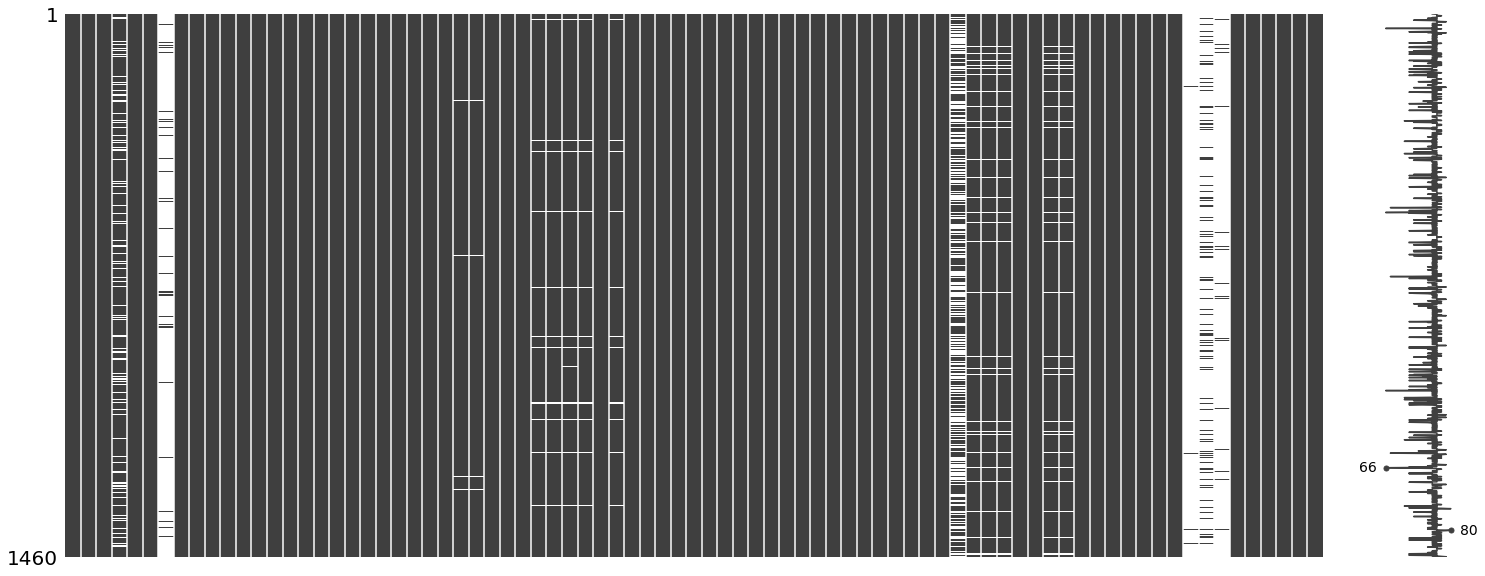

In [4]:
# Checking missing values:

msno.matrix(train)

In [5]:
# Function to calculate what percentage of values are missing in the column

def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) !=  0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total,percent], axis =1, keys = ['Total','Percent'])


In [6]:
missing_percentage(train)
missing_percentage(test)

,Total,Percent
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageYrBlt,78,5.35
GarageQual,78,5.35
GarageFinish,78,5.35
GarageCond,78,5.35


/Users/rohan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

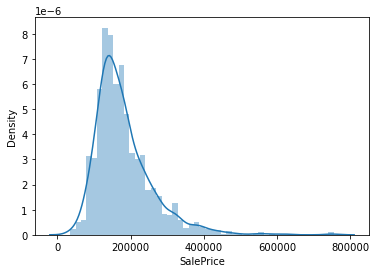

In [7]:
# Plotting histogram for the target variable

sns.distplot(train.loc[:,'SalePrice']) # Data distribution is not normal

In [8]:
# Finding correlation of dependent variables with other variables:

df_corr  = train.corr()["SalePrice"].sort_values(ascending=False)[1:11]
# Correlation gives out the top values which change with the independent variable. Scatter plots are better for visualization


In [9]:
df_corr

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [10]:
# Scatter plots

def custom_plot(x,y):
    plt.style.use('fivethirtyeight')
    plt.subplots(figsize = (12,8))
    plt.scatter(x=x, y=y)
    plt.xlabel('Sale Price')
    plt.ylabel(y.name)
    

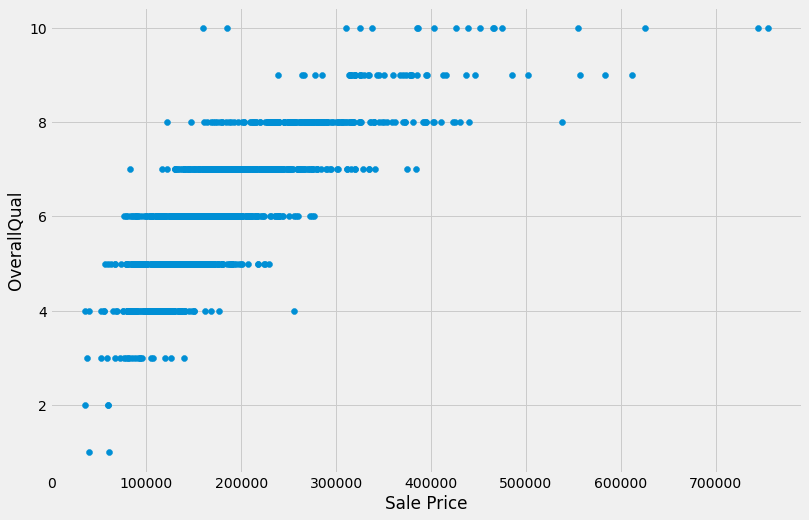

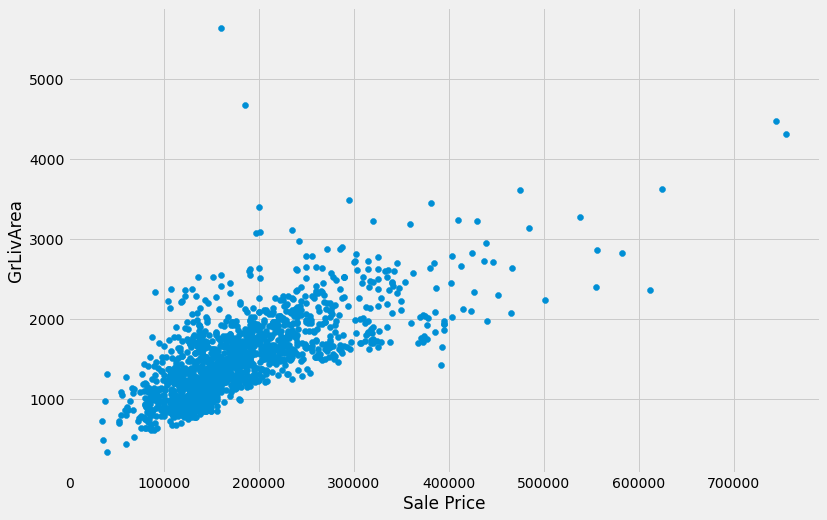

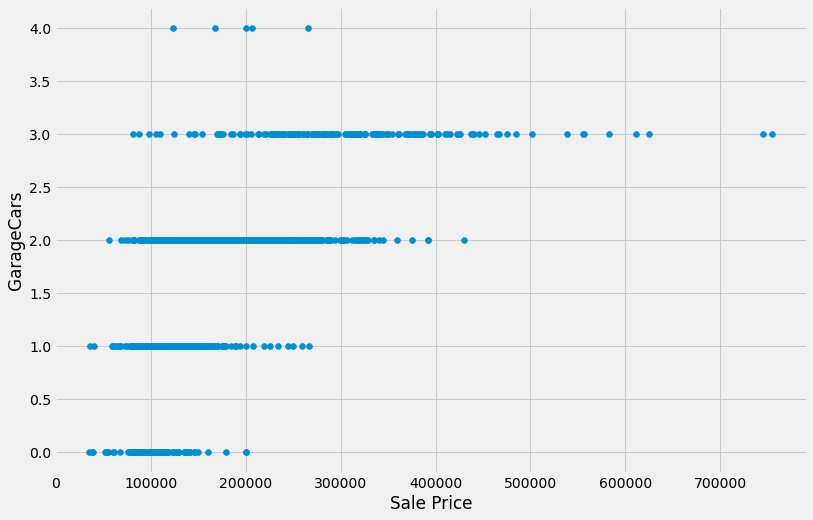

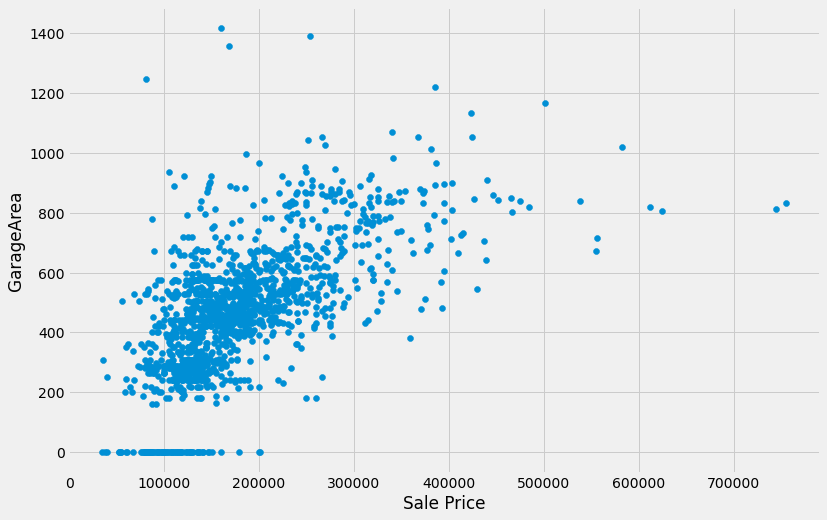

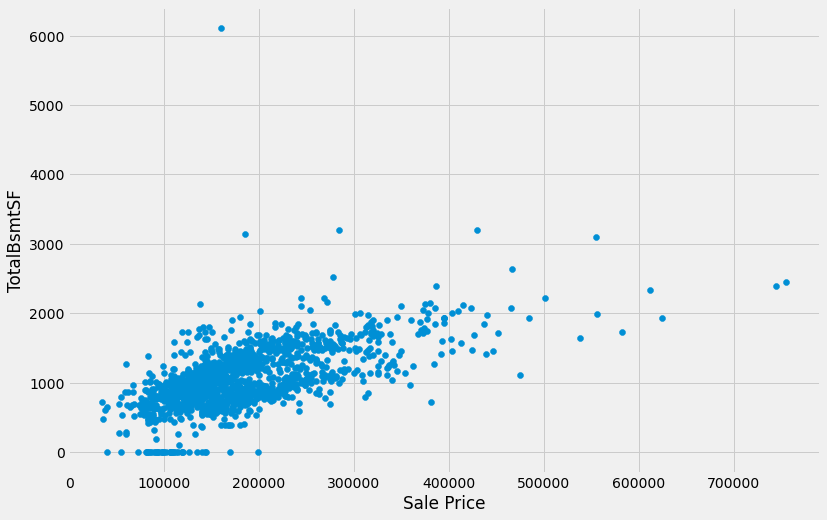

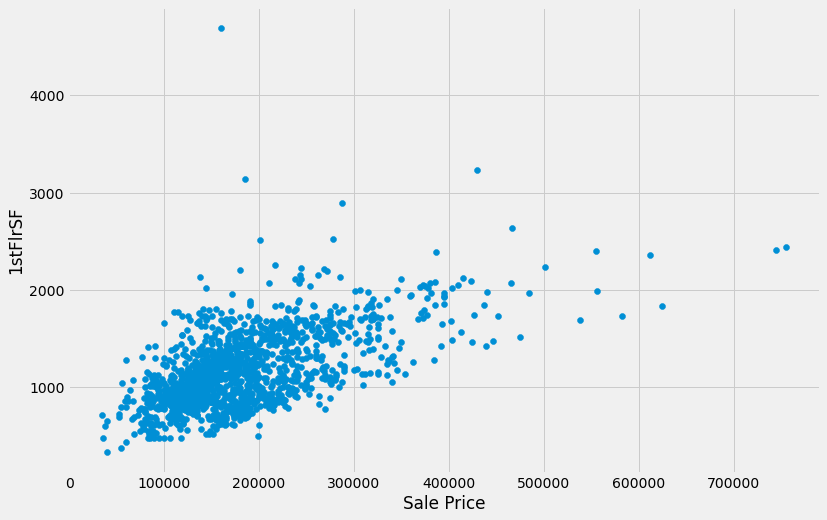

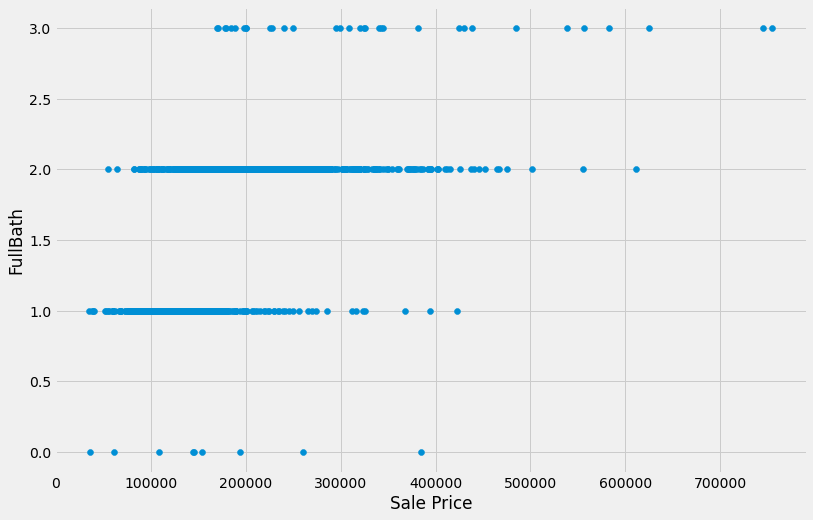

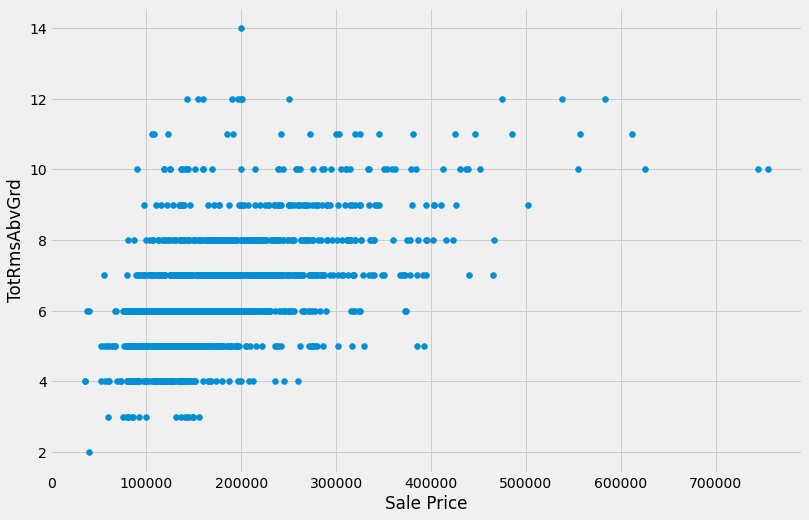

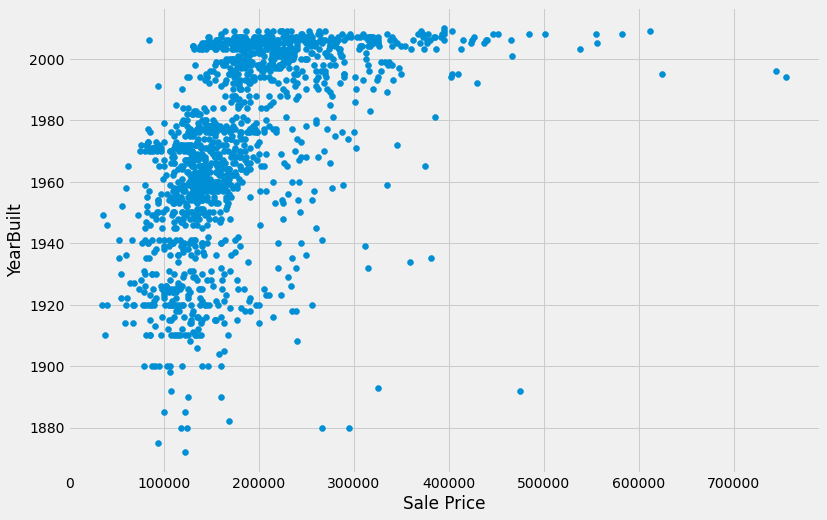

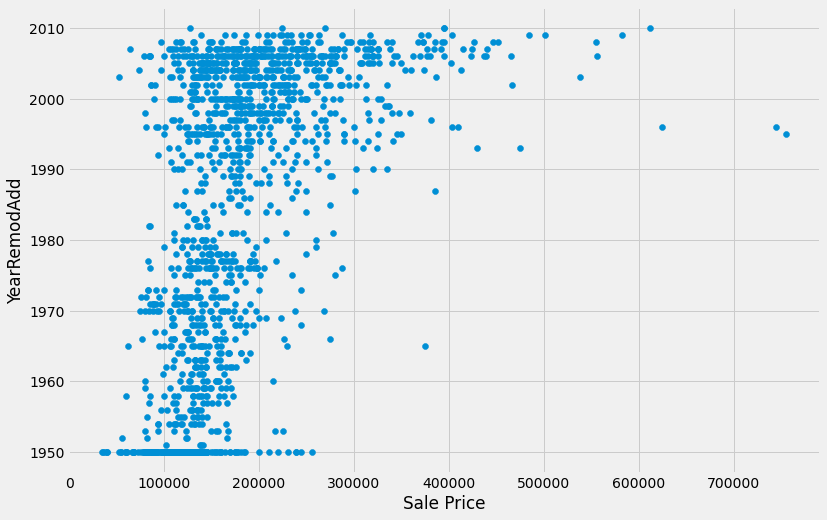

In [11]:
# Plot of saleprice vs top 10 correlated variables:

for i in df_corr.index:
    
    custom_plot(train['SalePrice'],train[i])
    


In [12]:
# Analyzing the graphs:
# If there are a very few outliers in the application, it would be worth the effort to get rid of the rows.
# For GrdLivArea, we observed that 2 of the values have absurdly low values of SalePrice for a large GrdLivArea.

train = train[train.GrLivArea < 4500]

In [13]:
# Feature engineering. 
# Combining train and test data to perform the feature engineering on the entire dataset at once.

all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

# 1. Removing missing values
missing_percentage(all_data)

# a. Some values have been intentionally left blank. For those values replace it with None. 
# (None is present as one of the categories for these columns)

missing_val_col = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
    all_data[i] = all_data[i].fillna('None')

# b. Replace null values for numeric columns with 0

missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_val_col2:
    all_data[i] = all_data[i].fillna(0)

# c. Replacing missing values of LotFrontage with the median value of each neighbourhood

all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

# d. MSSubClass has integer values for different types of houses. These types however are integers and need to be
# converted into strings. Leaving them as integers would lead to errors in preddictions since 30 would have a higher
# weightage as compared to 20. Similarly, YrSold and MoSold are numeric variables which need to be converted into numerical.

all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

# e. To fill null values for MSZoning, we do not have any fillers. We analyze it with MSClass(MSClass values are not
# null. We then transform the column using mode of MSZoning for one particular class)

# The mode functon is followed with a 0 since the mode function would return an index and a value. We need just the
# value and hence we slice the 0th value.

all_data['MSZoning']  = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

#f. Other such null values filling

all_data['Functional'] = all_data['Functional'].fillna('Typ') 
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub') 
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0]) 
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA") 
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr") 

In [14]:
# Handling skewness:

from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_feats

# Writing a function for applying boxcox transformation

def fixing_skewness(df):
    """
    This function takes in a dataframe and return fixed skewed dataframe
    """

    
    ## Getting all the data that are not of "object" type. 
    numeric_feats = df.dtypes[df.dtypes != "object"].index

    # Check the skew of all numerical features
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index

    for feat in skewed_features:
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))

fixing_skewness(all_data)

# boxcox_normmax returns optimal parameters (lambda) for the given data set. This would only work if the data points are
# strictly positive. Hence we add +1 in the parameter to handle '0' case.

# boxcox1p then converts the given dataframe into a boxcox transformation by the given lambda parameter.


/Users/rohan/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/rohan/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4053: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [15]:
# Adding new features for better understanding:

all_data['TotalSF'] = (all_data['TotalBsmtSF'] 
                       + all_data['1stFlrSF'] 
                       + all_data['2ndFlrSF'])

all_data['YrBltAndRemod'] = all_data['YearBuilt'] + all_data['YearRemodAdd']

all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] 
                                 + all_data['BsmtFinSF2'] 
                                 + all_data['1stFlrSF'] 
                                 + all_data['2ndFlrSF']
                                )

all_data['Total_Bathrooms'] = (all_data['FullBath'] 
                               + (0.5 * all_data['HalfBath']) 
                               + all_data['BsmtFullBath'] 
                               + (0.5 * all_data['BsmtHalfBath'])
                              )

all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] 
                              + all_data['3SsnPorch'] 
                              + all_data['EnclosedPorch'] 
                              + all_data['ScreenPorch'] 
                              + all_data['WoodDeckSF']
                             )
                              
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [16]:
all_data = all_data.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

# PoolQC has most of the null values
# Utilities and Street has most of the values of only 1 category

# Creating dummy variables:
final_features = pd.get_dummies(all_data).reset_index(drop=True)
final_features.shape

(2917, 334)

In [17]:
all_data.drop(columns=['Id'], inplace=True) # Removing ID column from the dataframe
y = train['SalePrice'].reset_index(drop=True)

In [18]:
# all_data includes data from both train and test. However we would need same number of rows for model fitting. Hence
# we would take only as many rows as the number of y rows.

X = final_features.iloc[:len(y), :]
X_sub = final_features.iloc[len(y):, :]

In [19]:
# Model fitting:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 0)

In [21]:
# Linear Regression:

import statsmodels.api as sm
X_sm = sm.add_constant(X_train)
X_sm_test = sm.add_constant(X_test)
model = sm.OLS(y_train,X_sm)
results = model.fit()
results.summary()

y_pred = results.predict(X_sm_test)
from sklearn import metrics
print('Mean absolute error is: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))

# Mean absolute error for the multiple linear regression model is 45416.01

# Using cross validation:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold

lin_reg = LinearRegression()
cv = KFold(shuffle=True, random_state=2, n_splits=10)
scores = cross_val_score(lin_reg, X,y,cv = cv, scoring='neg_mean_absolute_error')
scores

# Cross validation gives an idea as to how the model will perform on the dataset in general.
# It won't give any final parameters to test. Those parameters are given by Grid Search.
# Through the results of CV below, we determine that the average mean absolute error of the sale price would be 
# somewhere between 40k - 50k.

/Users/rohan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Mean absolute error is: 45416.01421453195


array([-48988.22101138, -42444.12564397, -45577.25855761, -48693.97852811,
       -47421.21287089, -50555.97634518, -40878.41966224, -40560.012779  ,
       -49081.43788174, -43861.75296826])

In [53]:
# Ridge regression

# This regression adds a penalty parameter given by (summation of square of coefficients)*(lambda) 
# to the cost function. While minimizing cost function, if lambda value is high, magnitude of coefficients is reduced.

# Note: Ridge regression does not reduce the coefficients to 0. The magnitude can become very less but not zero.

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_error

alpha_ = [-3,-2,-1,1e-15, 1e-10, 1e-8,1e-5,1e-4, 1e-3,1e-2,0.5,1,1.5, 2,3,4, 5, 10, 20, 30, 40]
temp_rss = {}
temp_mse = {}
temp_mae = {}

#Manually trying out different alpha values and calculating mean square error.

for i in alpha_:
    ridge = Ridge(alpha=i, normalize=True)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred - y_test)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss
    temp_mae[i] = mae

In [54]:
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

print('*****' * 20)

for key, value in sorted(temp_rss.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))
    
print('*****' * 20)

for key, value in sorted(temp_mae.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

print('Best mean absolute error value for Ridge regression is {}'.format(min(temp_mae.values())))

0.5: 754638216.3889462
1: 802084449.4493926
0.01: 827266519.8259194
0.001: 846593295.6011499
0.0001: 856757767.2792543
1.5: 861099222.3224895
1e-05: 864671711.6627108
1e-15: 865966355.3535215
1e-08: 866696844.4678502
1e-10: 866699744.7702762
2: 923126594.6281868
3: 1048594158.2132987
4: 1172335437.776583
5: 1292922854.7207394
10: 1839271448.7532792
20: 2677353810.833781
30: 3273499073.039231
40: 3713993211.2710743
-2: 94188696610.93015
-3: 119518771638.35759
-1: 1981237841125.071
****************************************************************************************************
0.5: 363735620299.47144
1: 386604704634.6074
0.01: 398742462556.09314
0.001: 408057968479.7543
0.0001: 412957243828.60046
1.5: 415049825159.4394
1e-05: 416771765021.4266
1e-15: 417395783280.39716
1e-08: 417747879033.5039
1e-10: 417749276979.2731
2: 444947018610.78625
3: 505422384258.80975
4: 565065681008.3127
5: 623188815975.3964
10: 886528838299.0798
20: 1290484536821.8816
30: 1577826553204.9094
40: 1790144727

In [56]:
from sklearn.linear_model import Lasso
temp_rss = {}
temp_mse = {}
temp_mae = {}


for i in alpha_:
    lasso = Lasso(alpha=i, normalize=True)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred - y_test)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss
    temp_mae[i] = mae
    
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

print('*****' * 20)

for key, value in sorted(temp_rss.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))
    
print('*****' * 20)

for key, value in sorted(temp_mae.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

print('Best mean absolute error value for Lasso regression is {}'.format(min(temp_mae.values())))

/Users/rohan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154401977699.3181, tolerance: 606822589.8178499
  model = cd_fast.enet_coordinate_descent(
/Users/rohan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154401977560.57645, tolerance: 606822589.8178499
  model = cd_fast.enet_coordinate_descent(
/Users/rohan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154401963824.99408, tolerance: 606822589.8178499
  model = cd_fast.enet_coordinate_descent(
/Users/rohan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_m

20: 704885087.1390136
30: 710608932.0044723
10: 721182625.9226545
40: 722122617.9070075
5: 748141648.3923593
4: 759762320.1392338
3: 774715127.5429157
2: 795146962.4773474
1.5: 806013237.8999089
1: 819156620.4185343
0.5: 835104903.3203007
0.001: 856469844.5239519
0.0001: 856491553.536386
1e-05: 856493784.5753775
1e-08: 856494040.1561618
1e-10: 856494040.409645
1e-15: 856494040.4122047
0.01: 856583981.5751836
-1: 7438760793.342853
-2: 25118431616.949196
-3: 56217169989.03446
****************************************************************************************************
20: 339754612001.0045
30: 342513505226.15533
10: 347610025694.7194
40: 348063101831.17773
5: 360604274525.11743
4: 366205438307.1104
3: 373412691475.6856
2: 383260835914.081
1.5: 388498380667.75635
1: 394833491041.7336
0.5: 402520563400.3849
0.001: 412818465060.5446
0.0001: 412828928804.5385
1e-05: 412830004165.33185
1e-08: 412830127355.27026
1e-10: 412830127477.4487
1e-15: 412830127478.68286
0.01: 412873479119.2389


In [59]:
# For elastic net regression:
# Elastic Net produces a regression model that is penalized with both the L1-norm and L2-norm. 
# The consequence of this is to effectively shrink coefficients (like in ridge regression) and to set some coefficients to zero (as in LASSO).

from sklearn.linear_model import ElasticNet

for i in alpha_:
    elastic_net = ElasticNet(alpha=i, normalize=True)
    elastic_net.fit(X_train, y_train)
    y_pred = elastic_net.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred - y_test)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss
    temp_mae[i] = mae
    
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

print('*****' * 20)

for key, value in sorted(temp_rss.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))
    
print('*****' * 20)

for key, value in sorted(temp_mae.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

print('Best mean absolute error value for Elastic net regression is {}'.format(min(temp_mae.values())))

/Users/rohan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12263890940654.281, tolerance: 606822589.8178499
  model = cd_fast.enet_coordinate_descent(
/Users/rohan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12328974887343.547, tolerance: 606822589.8178499
  model = cd_fast.enet_coordinate_descent(
/Users/rohan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12529933546086.506, tolerance: 606822589.8178499
  model = cd_fast.enet_coordinate_descent(
/Users/rohan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_

0.001: 753860185.4986235
0.0001: 790043685.4182987
1e-05: 835527683.5949919
1e-08: 856413498.229358
1e-10: 856493229.7631845
1e-15: 856494040.4041003
0.01: 1278649345.3602574
0.5: 5782462987.33563
1: 6126380954.793135
1.5: 6250400991.40967
2: 6314322464.705054
3: 6379567579.0981455
4: 6412698575.241138
5: 6432742670.77415
10: 6473208066.461446
20: 6493631666.339042
30: 6500468162.8164625
40: 6503891904.7757225
-3: 6654580537.462376
-2: 6727053814.759317
-1: 6954147029.811697
****************************************************************************************************
0.001: 363360609410.3366
0.0001: 380801056371.6202
1e-05: 402724343492.78613
1e-08: 412791306146.5504
1e-10: 412829736745.8553
1e-15: 412830127474.7763
0.01: 616308984463.6442
0.5: 2787147159895.772
1: 2952915620210.2915
1.5: 3012693277859.46
2: 3043503427987.833
3: 3074951573125.306
4: 3090920713266.2285
5: 3100581967313.1396
10: 3120086288034.4155
20: 3129930463175.4214
30: 3133225654477.5317
40: 3134875898101.898

In [28]:
#conda install lightgbm

Solving environment: done

## Package Plan ##

  environment location: /Users/rohan/opt/anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.12.0               |   py39hecd8cb5_0        14.5 MB
    lightgbm-3.2.1             |   py39h23ab428_0         996 KB
    ------------------------------------------------------------
                                           Total:        15.4 MB

The following NEW packages will be INSTALLED:

  lightgbm           pkgs/main/osx-64::lightgbm-3.2.1-py39h23ab428_0

The following packages will be UPDATED:

  conda                               4.10.3-py39hecd8cb5_0 --> 4.12.0-py39hecd8cb5_0



lightgbm-3.2.1       | 996 KB    | ##################################### | 100% 
conda-4.12.0         | 14.5 MB   | ##################################### | 100% 
Preparing transaction: done
Verifying transac

In [40]:
#Light GBM implementation:

from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

param_grid = { 'num_leaves': [4,6,8,12],
               'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
               'n_estimators': [500, 1000],
               'bagging_fraction': [0.5, 0.75],
               'feature_fraction': [0.2, 0.4],
               'max_bin': [200, 300, 500]
             }

model_lgbm = GridSearchCV(estimator = LGBMRegressor(objective = 'regression', bagging_freq = 5, feature_fraction_seed = 7),
param_grid = param_grid)
model_lgbm.fit(X_train, y_train)


#Using Grid Search CV, I have tuned the model and calculated the best parameters that would return maximum R2 value.

lightgbm = LGBMRegressor(bagging_fraction= 0.75,
 feature_fraction= 0.4,
 learning_rate= 0.1,
 max_bin= 500,
 n_estimators = 500,
 num_leaves = 4,
 verbose = -1 )
lightgbm.fit(X_train, y_train)
y_pred  = lightgbm.predict(X_test)

# Metrics:
print('Mean absolute error using light gradient boost is {}'.format(mean_absolute_error(y_test, y_pred)))



Mean absolute error using light gradient boost is 16012.653085261363


In [52]:
# The below block of code is giving out errors due to presence of very large floats. Using standard scaler to fix
# this issue.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_trainScaled = scaler.fit_transform(X_train)
x_testScaled = scaler.fit_transform(X_test)

import xgboost as xgbr

# Tuning tree based parameters keeping learning rate and estimators constant:  max_depth =3
# Tune gamma : 0 {Gamma does not make much of a difference in the final scores}
# Tune subsample and col_bytree: col_bytree:0.6, subsample: 0.8
# Tuning regularization parameter (alpha) : The alpha parameter was giving extreme values without much change in the score, Hence, it has been left to it's default value.
# Learning rate and trees: learning_rate:0.1 and n_estimators:500


# Grid Search CV was used for each iteration and best parameters were calculated. 

#model_xgbr = GridSearchCV(estimator=xgbr, param_grid=params)

# Final parameters:
xgboost_model = xgbr.XGBRegressor(learning_rate = 0.1, n_estimators = 500, max_depth = 3, gamma=0, col_bytree = 0.6, subsample = 0.8)
xgboost_model.fit(x_trainScaled, y_train)
y_pred = xgboost_model.predict(x_testScaled)

print('Mean absolute error: {}'.format(mean_absolute_error(y_test, y_pred)))

               

[12:34:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "col_bytree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Mean absolute error: 15531.200004862552


*Final metrics for all the models:*

1. Multiple linear regression:
mae - 45416.01

2. Ridge regression:
mae - 17578.1

3. Lasso regression:
mae - 17577.88

4. Elastic net regression:
mae - 17577.88

4. Light gradient boosting:
mae - 16012.65

5. XGBoost
mae - 15531.2